In [2]:
from functools import cache
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [17]:
def F(x, t):
    return np.exp(2 * x + t) - np.exp(t ** 2) - 2 * np.cos(x)


def x_t(t):
    """
    Функция для получения функции зависимости x(t) из F(x(t), t)
    """
    x_initial_guess = 0
    x_solution = fsolve(F, x_initial_guess, args=(t))
    return x_solution[0]


@cache
def calc_fibonacci(n):
    """
    Функция для получения чисел Фибоначи
    """
    if n == 0:
        return 1
    if n == 1:
        return 1
    return calc_fibonacci(n - 1) + calc_fibonacci(n - 2)


def fibonacci_minimization(f, a, b, eps):
    """
    Функция для минимизации функции через метод Фибоначи
    """
    
    # ищем n по формуле
    n = 1
    while (b - a) / calc_fibonacci(n + 1) >= eps:
        n += 1
    
    # алгоритм для метода Фибоначи
    for k in range(n - 1):
        
        alpha = a + (calc_fibonacci(n - k - 1) / calc_fibonacci(n - k + 1)) * (b - a)
        beta = a + (calc_fibonacci(n - k) / calc_fibonacci(n - k + 1)) * (b - a)

        if f(alpha) <= f(beta):
            a, b = a, beta
        else:
            a, b = alpha, b

    return b

In [18]:
epsilon = 1e-6
t1, t2 = 0, 2

t_min = fibonacci_minimization(lambda t: x_t(t), t1, t2, epsilon)
t_max = fibonacci_minimization(lambda t: -x_t(t), t1, t2, epsilon)

print(f"Минимум функции x(t) достигается при t = {t_min}, x(t) = {x_t(t_min)}")
print(f"Максимум функции x(t) достигается при t = {t_max}, x(t) = {x_t(t_max)}")

Минимум функции x(t) достигается при t = 0.9165990683599063, x(t) = 0.26480794519252865
Максимум функции x(t) достигается при t = 2, x(t) = 1.0096529685277487


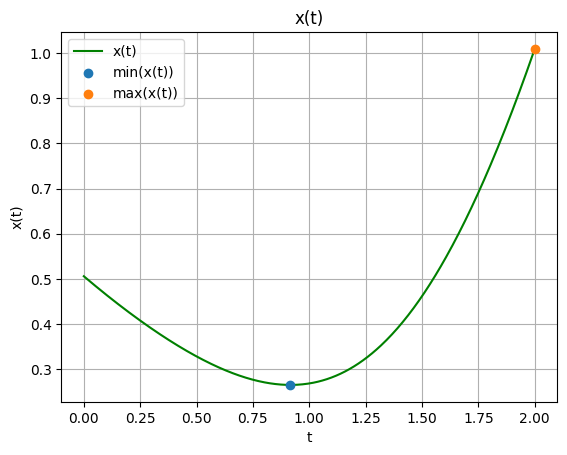

In [26]:

t_values = np.linspace(t1, t2, 500)
x_values = np.array([x_t(t) for t in t_values])

plt.plot(t_values, x_values, label='x(t)', c='g')
plt.scatter(t_min, x_t(t_min), label='min(x(t))', zorder=2)
plt.scatter(t_max, x_t(t_max), label='max(x(t))', zorder=3)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t)')
plt.grid(True)
plt.legend()
plt.show()